# Assumptions in MultiLinear Regression:

1. Linearity: The relationship between the presictors and the response is linear.

2. Independence: Observations are independent of each other.

3. Homoscedasticity: The residuals exhibit constant variance at all levels of the predictor.

4. Normal Distribution of Errors: The residuals of the model are normally distributed.

5. No Multicollinearity: The independent variables should not be too highly correlated with each other. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import numpy as np

In [6]:
cars = pd.read_csv("Cars.csv")
cars

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [7]:
# Rearrange the columns
cars = pd.DataFrame(cars, columns=["HP", "VOL", "SP", "WT", "MPG"])
cars.head()

,HP,VOL,SP,WT,MPG
0,49,89,104.185353,28.762059,53.700681
1,55,92,105.461264,30.466833,50.013401
2,55,92,105.461264,30.193597,50.013401
3,70,92,113.461264,30.632114,45.696322
4,53,92,104.461264,29.889149,50.504232


# Description of columns

-MPG : Milege of the car

-VOL : Volume of the car (size)

-SP : Top speed of the car (Miles per Hour)

-WT : Weight of the car (Pounds)

-HP : Horse Power of the car.

# EDA

In [8]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   VOL     81 non-null     int64  
 2   SP      81 non-null     float64
 3   WT      81 non-null     float64
 4   MPG     81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [9]:
cars.isna().sum()

HP     0
VOL    0
SP     0
WT     0
MPG    0
dtype: int64

### Observations:

-No missing values are observed here.

-There are 81 observations.

-The Data types of the columns are relevant.

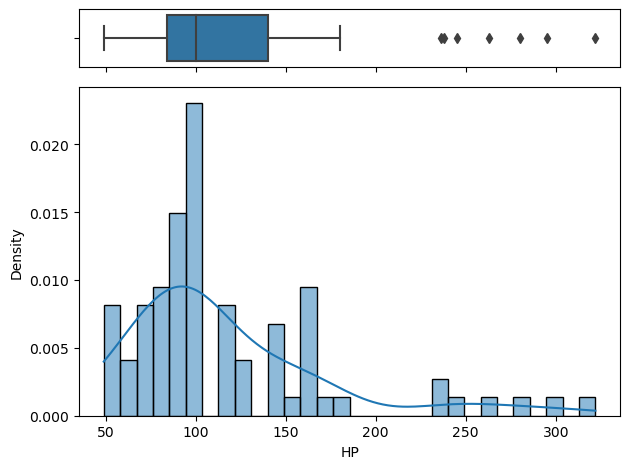

In [11]:
# Create a figure with two subplots (one above the other)
fig, (ax_box, ax_hist)=plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Creating a boxplot
sns.boxplot(data=cars, x='HP', ax=ax_box, orient='h')
ax_box.set(xlabel='')

# Creating a histogram in the same x-axis
sns.histplot(data=cars, x='HP', ax=ax_hist, bins=30, kde=True, stat="density")
ax_hist.set(ylabel='Density')

# Adjust Layout
plt.tight_layout()
plt.show()